### Business Problem

According to a report by CDC in 2019, road traffic crashes are a leading cause of death in the United States for people aged 1–54 and the leading cause of non-natural death for healthy U.S. citizens residing or traveling abroad. 
WHO in a 2018 report profiled the following facts concerning global road traffic injuries and deaths; 
*	Each year, 1.35 million people are killed on roadways around the world.
*	Every day, almost 3,700 people are killed globally in road traffic crashes involving cars, buses, motorcycles, bicycles, trucks, or pedestrians. More than half of those killed are pedestrians, motorcyclists, and cyclists.
*	Road traffic injuries are estimated to be the eighth leading cause of death globally for all age groups and the leading cause of death for children and young people 5–29 years of age.

Car crashes are a public health concern both globally and in the United States but, these injuries and deaths are preventable and the impact and consequences of these accidents can be minimised. Conventional techniques and methodologies have been used in the past to predict the severity of clashes, though these had a number of drawbacks in producing quality and accurate inferences. This project aims to predict the severity of accidents and how the impact can be minimised based on a number of factors and for the purposes of this project we will use data relating to Seattle city.

The solutions seeks to provide aid to the Seattle’s Department of Transportation (SDOT) in its transportation infrastructure planning, building and maintenance to ensure that it tailor makes its road networks in a manner that addresses the rise in accidents.

The solution will also help the Department of Health in planning for relevant equipment and resources required based on the predicted accident severities. This will help them in acquiring resources that appropriately address the problems and injuries on a particular accident scene. 

Road users in general, that is, pedestrians and motorists will be advised accordingly if the information is publicly availed to Seattle citizens and passer-by’s to take precautionary measures to reduce severity of accidents.


### Data Description

For the purposes of this project, the already existing Seattle City accident csv dataset will be used to predict the severity of an accident as such no further data gathering procedures or scraping processes were performed in an attempt to collect the data.

In general the whole dataset, shows the severity of an accident which we will in this particular case use as our label to predict using supervised learning. The dataset contains 194,673 unique instances that I will analyse and also use these to train and test the model. The model should be a more generalised state to allow it to be implemented in other similar instances avoiding over/under fitting problems. 

The data will be cleaned and sanitized and the following procedures shall be performed on the dataset to arrive at the most adequate and clean state for the data. 

Data pre-processing and feature engineering techniques required;
*   Handling missing values will help us in filling null values or completely removing the records to ensure that a record is fully represented. 
*   Dropping useless columns to avoid noise and to use adequately informed data inputs and records
*   Encoding categorical values i.e. converting the information into a more machine-readable form
*   Changing data types will allow us to use appropriate data formats and forms during the analysis and model building.
*   Normalization and variable transformation using feature scaling will bring in numerical stability within the dataset and avoiding inaccurate inferences within the model.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
%matplotlib inline

#### Importing and describe the Seattle City accidents data

In [2]:
df = pd.read_csv(r"C:\Users\leon.vambe.ECONETZW\Documents\seattle\seattle_collisions.csv")
print("Unique Records are",df['OBJECTID'].nunique())
df.describe()

C:\Users\leon.vambe.ECONETZW\AppData\Local\Continuum\anaconda3\envs\mla\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unique Records are 194673


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [3]:
df.isnull()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


#### Checking the columns and rows for the dataset and the names of the columns

In [4]:
print(df.shape)
print(df.columns.tolist())

(194673, 38)
['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']


#### Checking the data types for columns within the dataset

In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

### Methodology (Theory and Approach)

Predictive analytics is the practice of extracting information from existing data sets in order to determine patterns and predict future outcomes and trends. It has a wide range of applications in different fields, such as finance, education, healthcare, and law (Sas, 2017). I shall likewise use previoius similar data to model an algorithm that predicts the severity of an accident based on a number of factors.

For the purposes of this project, the already existing Seattle City accident csv dataset will be used to predict the severity of an accident as such no further data gathering procedures or scraping processes were performed in an attempt to collect the data. The machine learning pipeline entails that after data gathering and securing a storage facility for your data, it is imperative that the data is cleaned and that feature engineering is performed to ensure that data tidiness and quality is achieved. Below are a series of approaches that I performed in coming up with a high quality dataset that was then used to build the machine learning model;

* The first step was to perform data description checks which allowed me to have a clear uunderstanding of the nature of data that is available.


* We then dropped useless fields or columns from the dataset which have no impact to the performance of our model as part of the data cleaning process.


* Null variables are filled/replaced or dropped in a data science project, in our case, we opted for the dropping of all NaN records on geo locations provided to ensure that every accidental incident we have has a representation of the actual location or position it occured. This helps in building a more accurate model with minimal inaccurate inferences.


* Using label encoding techniques such as OneHot encoding and the brute force method mainly taking advantage of the scikit learn library, we managed to encode the categorical variables into machine readable formats.


* Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA in our case was to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.According to https://www.itl.nist.gov, Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to;
 * maximize insight into a data set,
 * uncover underlying structure,
 * extract important variables,
 * detect outliers and anomalies,
 * test underlying assumptions,
 * develop parsimonious models and
 * determine optimal factor settings.


* We used histograms, pie charts, scatter plots and bar graphs to have an indepth statistical understanding of our features. We also used scatter plots to ascertain the relationships and or correlations within our available features.


* Feature Selection and Feature Engineering to ensure that we use the ost relevant variables in building our model.


* Feature Scaling - Standardization was used to normalise the data for the model. Standardization (or z-score normalization) scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features(https://towardsdatascience.com.


* The dataset is then split into training set and testing set. 80% of the dataset comprises the training set and 20% of the dataset is the testing set. After the development of the model, the model is used on another data set to test its effectiveness. Data used for such purpose is called test data or test set. The reason for using two different sets is to ensure that the model is flexible enough to be used on data sets other than the one it was built with. Otherwise, the problem of overfitting may occur, which is when a model is accurate with its original data set, but performs poorly on other data sets, because it is overly complicated  A common method to avoid overfitting is to divide the input data set into training and test sets.


* We used a supervised learning approach in building our model as we tried to build a multi-classification algorithm that predicts the severity of an accident. To ensure that a higher accuracy is obtained we performed hyper paramater tuning to our model and the success of this approach was being measured using ACCURACY to predict the test set and also using the confusion matrix to check the true/false positives and true/false negatives that wer predicted.

#### Data Cleaning and Preprocessing

#### Removing useless fields or columns from the dataset for the analysis in question.

In [6]:
df_a = df.drop(columns=['OBJECTID', 'INCKEY','COLDETKEY','REPORTNO','INTKEY','LOCATION','SEVERITYDESC','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','INCDATE','SDOTCOLNUM','ST_COLDESC','ST_COLCODE','SDOTCOLNUM'])

In [7]:
print(df_a.columns.tolist())

['SEVERITYCODE', 'X', 'Y', 'STATUS', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']


In [8]:
df_a.head()

,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Matched,Intersection,Angles,2,0,0,2,...,NaN,N,Overcast,Wet,Daylight,NaN,NaN,0,0,N
1,1,-122.347294,47.647172,Matched,Block,Sideswipe,2,0,0,2,...,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,0,N
2,1,-122.334540,47.607871,Matched,Block,Parked Car,4,0,0,3,...,NaN,0,Overcast,Dry,Daylight,NaN,NaN,0,0,N
3,1,-122.334803,47.604803,Matched,Block,Other,3,0,0,3,...,NaN,N,Clear,Dry,Daylight,NaN,NaN,0,0,N
4,2,-122.306426,47.545739,Matched,Intersection,Angles,2,0,0,2,...,NaN,0,Raining,Wet,Daylight,NaN,NaN,0,0,N


In [9]:
df_a.shape

(194673, 24)

In [10]:
df_a['Date'] = pd.to_datetime(df_a['INCDTTM'])

In [11]:
df_a['month'] = df_a['Date'].dt.month

In [12]:
df_a = df_a.drop(columns=['INCDTTM','Date'])

In [13]:
df_a

,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,month
0,2,-122.323148,47.703140,Matched,Intersection,Angles,2,0,0,2,...,N,Overcast,Wet,Daylight,NaN,NaN,0,0,N,3
1,1,-122.347294,47.647172,Matched,Block,Sideswipe,2,0,0,2,...,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,0,N,12
2,1,-122.334540,47.607871,Matched,Block,Parked Car,4,0,0,3,...,0,Overcast,Dry,Daylight,NaN,NaN,0,0,N,11
3,1,-122.334803,47.604803,Matched,Block,Other,3,0,0,3,...,N,Clear,Dry,Daylight,NaN,NaN,0,0,N,3
4,2,-122.306426,47.545739,Matched,Intersection,Angles,2,0,0,2,...,0,Raining,Wet,Daylight,NaN,NaN,0,0,N,1
5,1,-122.387598,47.690575,Matched,Intersection,Angles,2,0,0,2,...,N,Clear,Dry,Daylight,NaN,NaN,0,0,N,4
6,1,-122.338485,47.618534,Matched,Intersection,Angles,2,0,0,2,...,0,Raining,Wet,Daylight,NaN,NaN,0,0,N,12
7,2,-122.320780,47.614076,Matched,Intersection,Cycles,3,0,1,1,...,N,Clear,Dry,Daylight,NaN,NaN,6855,0,N,4
8,1,-122.335930,47.611904,Matched,Block,Parked Car,2,0,0,2,...,0,Clear,Dry,Daylight,NaN,NaN,0,0,N,6
9,2,-122.384700,47.528475,Matched,Intersection,Angles,2,0,0,2,...,0,Clear,Dry,Daylight,NaN,NaN,0,0,N,3


#### Dropping Null Values

In [14]:
df_a=df_a.dropna(how='any', subset=['X', 'Y'])

In [15]:
df_a.shape

(189339, 24)

#### Data description of the categorical fields available to pick out the composition of the categories within a particular column

In [16]:
print(df_a['ADDRTYPE'].value_counts())
print(" ")
print(df_a['COLLISIONTYPE'].value_counts())
print(" ")
print(df_a['JUNCTIONTYPE'].value_counts())
print(" ")
print(df_a['SDOT_COLDESC'].value_counts())
print(" ")
print(df_a['INATTENTIONIND'].value_counts())
print(" ")
print(df_a['UNDERINFL'].value_counts())
print(" ")
print(df_a['WEATHER'].value_counts())
print(" ")
print(df_a['ROADCOND'].value_counts())
print(" ")
print(df_a['LIGHTCOND'].value_counts())
print(" ")
print(df_a['PEDROWNOTGRNT'].value_counts())
print(" ")
print(df_a['SPEEDING'].value_counts())
print(" ")
print(df_a['HITPARKEDCAR'].value_counts())

Block           124591
Intersection     64748
Name: ADDRTYPE, dtype: int64
 
Parked Car    46381
Angles        34460
Rear Ended    32968
Other         22277
Sideswipe     18034
Left Turn     13624
Pedestrian     6551
Cycles         5378
Right Turn     2912
Head On        1997
Name: COLLISIONTYPE, dtype: int64
 
Mid-Block (not related to intersection)              87390
At Intersection (intersection related)               62491
Mid-Block (but intersection related)                 22465
Driveway Junction                                    10580
At Intersection (but not related to intersection)     2071
Ramp Junction                                          143
Unknown                                                  6
Name: JUNCTIONTYPE, dtype: int64
 
MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          84538
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    53213
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9780
MOTOR VEHICLE RAN OFF ROAD - 

#### Replacing missing values

In [17]:
df_a['ADDRTYPE'] = df_a['ADDRTYPE'].replace(np.nan, "not provided")
df_a['COLLISIONTYPE'] = df_a['COLLISIONTYPE'].replace(np.nan, "not provided")
df_a['JUNCTIONTYPE'] = df_a['JUNCTIONTYPE'].replace(np.nan, "not provided")
df_a['INATTENTIONIND'] = df_a['INATTENTIONIND'].replace(np.nan, "not provided")
df_a['UNDERINFL'] = df_a['UNDERINFL'].replace("N","0")
df_a['UNDERINFL'] = df_a['UNDERINFL'].replace("Y","1")
df_a['UNDERINFL'] = df_a['UNDERINFL'].replace(np.nan,"not provided")
df_a['WEATHER'] = df_a['WEATHER'].replace(np.nan, "not provided")
df_a['LIGHTCOND'] = df_a['LIGHTCOND'].replace(np.nan, "not provided")
df_a['ROADCOND'] = df_a['ROADCOND'].replace(np.nan, "not provided")
df_a['PEDROWNOTGRNT'] = df_a['PEDROWNOTGRNT'].replace(np.nan, "not provided")
df_a['SPEEDING'] = df_a['SPEEDING'].replace(np.nan, "not provided")
df_a['SPEEDING'] = df_a['SPEEDING'].replace(np.nan, "not provided")

#### Label Encoding using the SciKit learn library

In [29]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df_a['HITPARKEDCAR_cat'] = labelencoder.fit_transform(df_a['HITPARKEDCAR'])
df_a['SPEEDING_cat'] = labelencoder.fit_transform(df_a['SPEEDING'])
df_a['PEDROWNOTGRNT_cat'] = labelencoder.fit_transform(df_a['PEDROWNOTGRNT'])
df_a['INATTENTIONIND_cat'] = labelencoder.fit_transform(df_a['INATTENTIONIND'])
df_a['SDOT_COLDESC_cat'] = labelencoder.fit_transform(df_a['SDOT_COLDESC'])
df_a['ADDRTYPE_cat'] = labelencoder.fit_transform(df_a['ADDRTYPE'])
df_a['COLLISIONTYPE_cat'] = labelencoder.fit_transform(df_a['COLLISIONTYPE'])
df_a['JUNCTIONTYPE_cat'] = labelencoder.fit_transform(df_a['JUNCTIONTYPE'])
df_a['ROADCOND_cat'] = labelencoder.fit_transform(df_a['ROADCOND'])
df_a['LIGHTCOND_cat'] = labelencoder.fit_transform(df_a['LIGHTCOND'])
df_a['WEATHER_cat'] = labelencoder.fit_transform(df_a['WEATHER'])
df_a['SPEEDING_cat'] = labelencoder.fit_transform(df_a['SPEEDING'])
df_a['COLLISIONTYPE_cat'] = labelencoder.fit_transform(df_a['COLLISIONTYPE'])
df_a['STATUS_cat'] =  labelencoder.fit_transform(df_a['STATUS'])
df_a['UNDERINFL_cat'] =  labelencoder.fit_transform(df_a['UNDERINFL'])

In [30]:
df_a.columns

Index(['SEVERITYCODE', 'X', 'Y', 'STATUS', 'ADDRTYPE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'month',
       'HITPARKEDCAR_cat', 'SPEEDING_cat', 'PEDROWNOTGRNT_cat',
       'INATTENTIONIND_cat', 'SDOT_COLDESC_cat', 'ADDRTYPE_cat',
       'COLLISIONTYPE_cat', 'JUNCTIONTYPE_cat', 'ROADCOND_cat',
       'LIGHTCOND_cat', 'WEATHER_cat', 'STATUS_cat', 'UNDERINFL_cat'],
      dtype='object')

In [31]:
df_b = df_a[['SEVERITYCODE', 'X', 'Y','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'SDOT_COLCODE','ROADCOND_cat','SEGLANEKEY', 'CROSSWALKKEY', 'month',
       'HITPARKEDCAR_cat', 'SPEEDING_cat', 'PEDROWNOTGRNT_cat',
       'INATTENTIONIND_cat', 'SDOT_COLDESC_cat', 'ADDRTYPE_cat',
       'COLLISIONTYPE_cat', 'JUNCTIONTYPE_cat', 'LIGHTCOND_cat',
       'WEATHER_cat','STATUS_cat','UNDERINFL_cat']]

In [32]:
df_b.shape

(189339, 24)

In [33]:
print(df_b.columns.tolist())

['SEVERITYCODE', 'X', 'Y', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'ROADCOND_cat', 'SEGLANEKEY', 'CROSSWALKKEY', 'month', 'HITPARKEDCAR_cat', 'SPEEDING_cat', 'PEDROWNOTGRNT_cat', 'INATTENTIONIND_cat', 'SDOT_COLDESC_cat', 'ADDRTYPE_cat', 'COLLISIONTYPE_cat', 'JUNCTIONTYPE_cat', 'LIGHTCOND_cat', 'WEATHER_cat', 'STATUS_cat', 'UNDERINFL_cat']


In [34]:
df_b

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,ROADCOND_cat,SEGLANEKEY,...,PEDROWNOTGRNT_cat,INATTENTIONIND_cat,SDOT_COLDESC_cat,ADDRTYPE_cat,COLLISIONTYPE_cat,JUNCTIONTYPE_cat,LIGHTCOND_cat,WEATHER_cat,STATUS_cat,UNDERINFL_cat
0,2,-122.323148,47.703140,2,0,0,2,11,8,0,...,1,1,14,1,0,1,5,4,0,0
1,1,-122.347294,47.647172,2,0,0,2,16,8,0,...,1,1,16,0,9,4,2,6,0,0
2,1,-122.334540,47.607871,4,0,0,3,14,0,0,...,1,1,17,0,5,4,5,4,0,0
3,1,-122.334803,47.604803,3,0,0,3,11,0,0,...,1,1,14,0,4,4,5,1,0,0
4,2,-122.306426,47.545739,2,0,0,2,11,8,0,...,1,1,14,1,0,1,5,6,0,0
5,1,-122.387598,47.690575,2,0,0,2,11,0,0,...,1,1,14,1,0,1,5,1,0,0
6,1,-122.338485,47.618534,2,0,0,2,11,8,0,...,1,1,14,1,0,1,5,6,0,0
7,2,-122.320780,47.614076,3,0,1,1,51,0,6855,...,1,1,29,1,1,1,5,1,0,0
8,1,-122.335930,47.611904,2,0,0,2,11,0,0,...,1,1,14,0,5,4,5,1,0,0
9,2,-122.384700,47.528475,2,0,0,2,11,0,0,...,1,1,14,1,0,1,5,1,0,0


#### Exploratory Data Analysis

#### Histogram to show quantifiable or numerical variables within the dataset

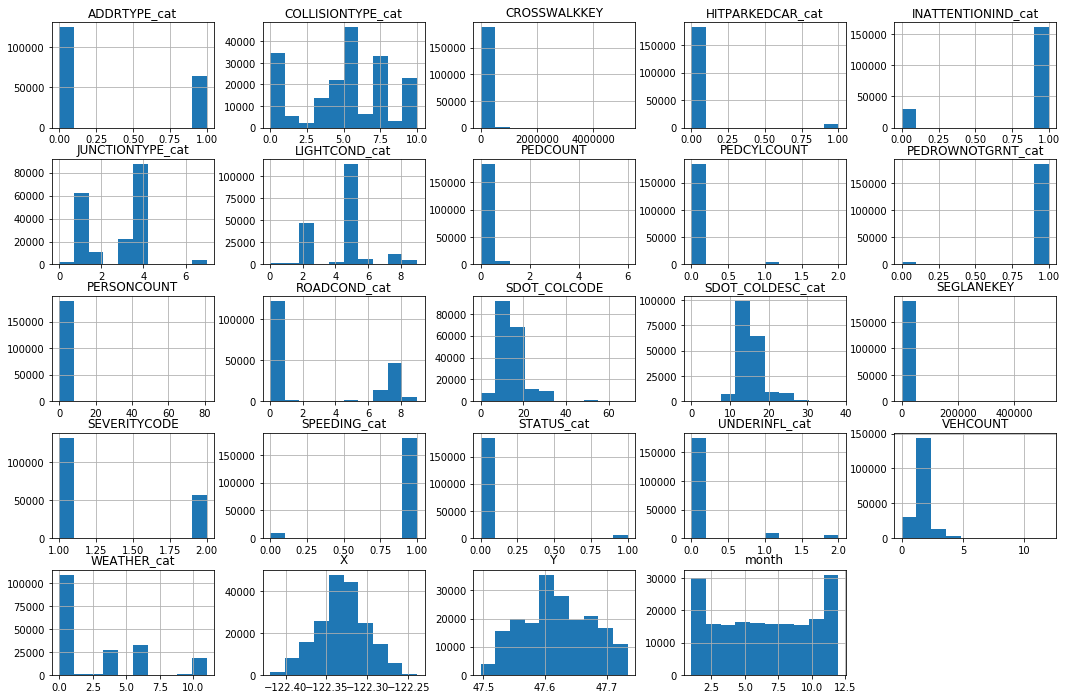

In [139]:
df_b.hist(figsize=(18,12))
plt.show()

In [147]:
from IPython.display import display
import folium
seattle_cdn = (47.60,-122.33)
seattle_map = folium.Map(seattle_cdn, zoom_start=11)
# display map
display(seattle_map)

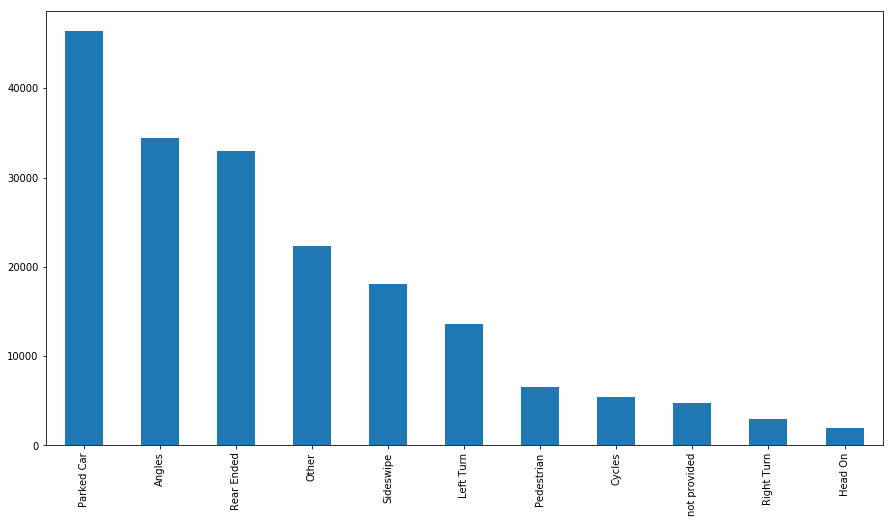

In [72]:
plt.figure(figsize=(15,8))
df_a['COLLISIONTYPE'].value_counts().plot(kinQd='bar');

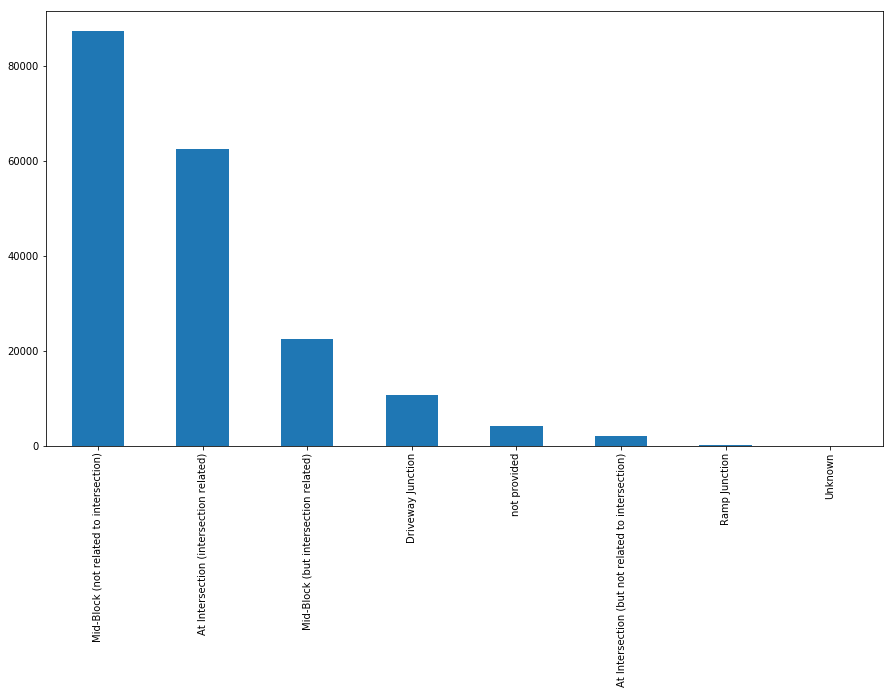

In [74]:
plt.figure(figsize=(15,8))
df_a['JUNCTIONTYPE'].value_counts().plot(kind='bar');

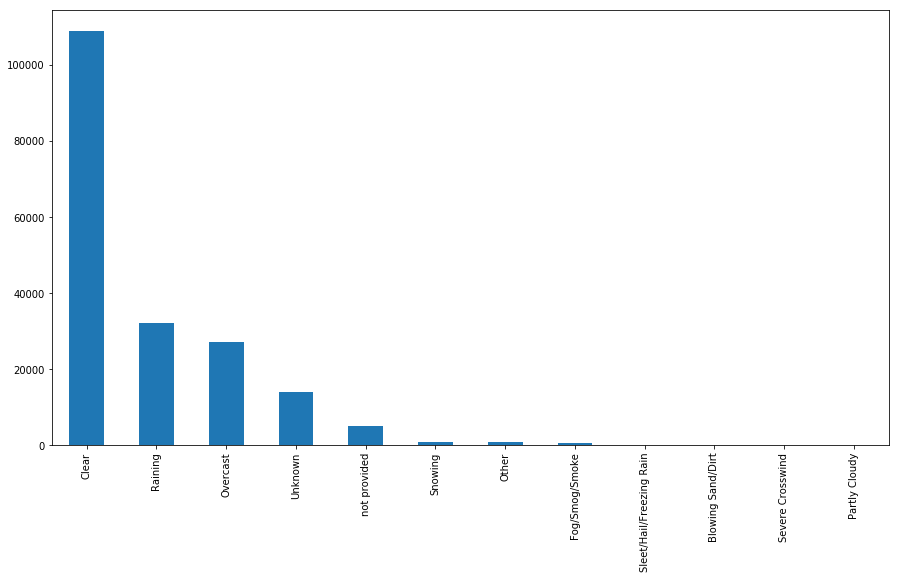

In [76]:
plt.figure(figsize=(15,8))
df_a['WEATHER'].value_counts().plot(kind='bar');

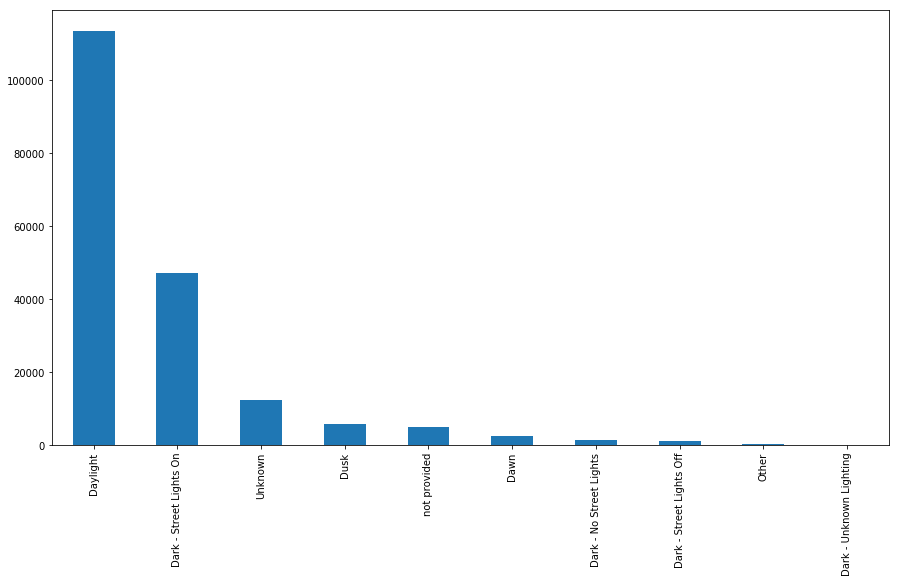

In [136]:
plt.figure(figsize=(15,8))
df_a['LIGHTCOND'].value_counts().plot(kind='bar');

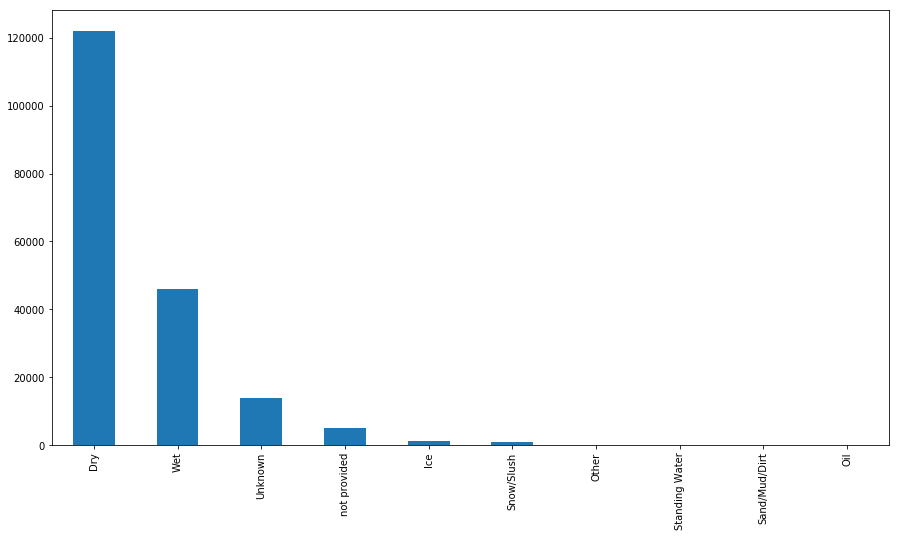

In [78]:
plt.figure(figsize=(15,8))
df_a['ROADCOND'].value_counts().plot(kind='bar');

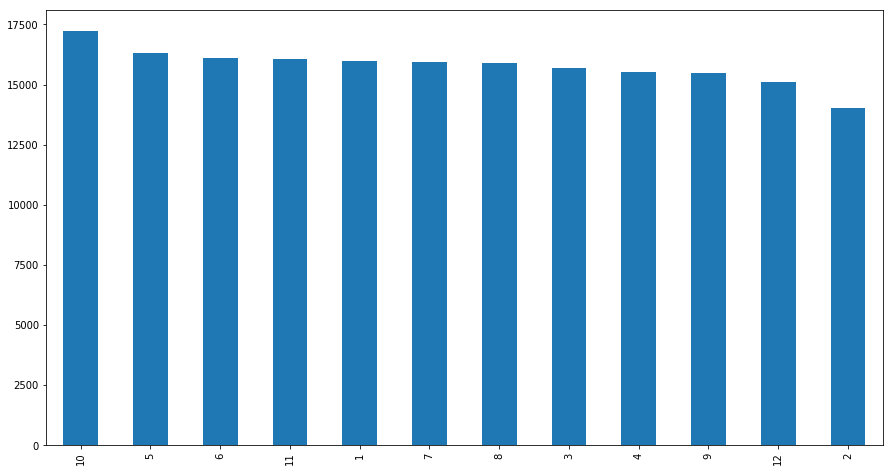

In [85]:
plt.figure(figsize=(15,8))
df_b['month'].value_counts().plot(kind='bar');

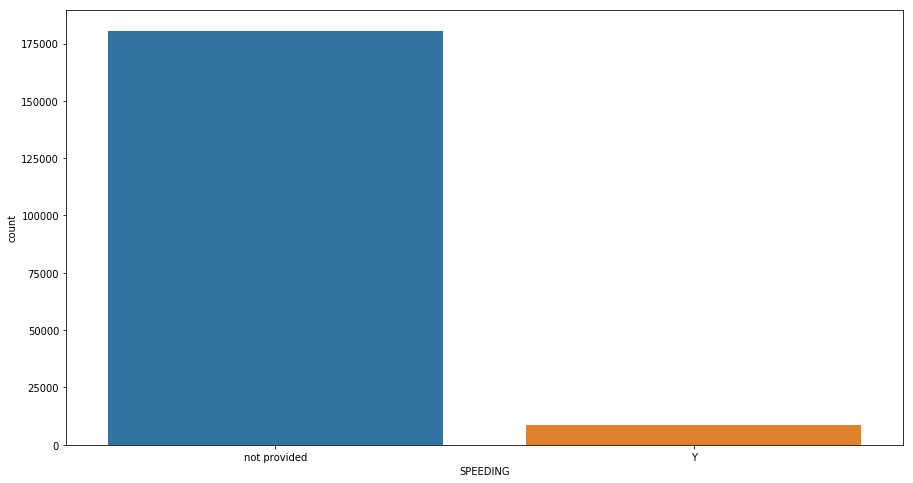

In [109]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'SPEEDING', data = df_a);

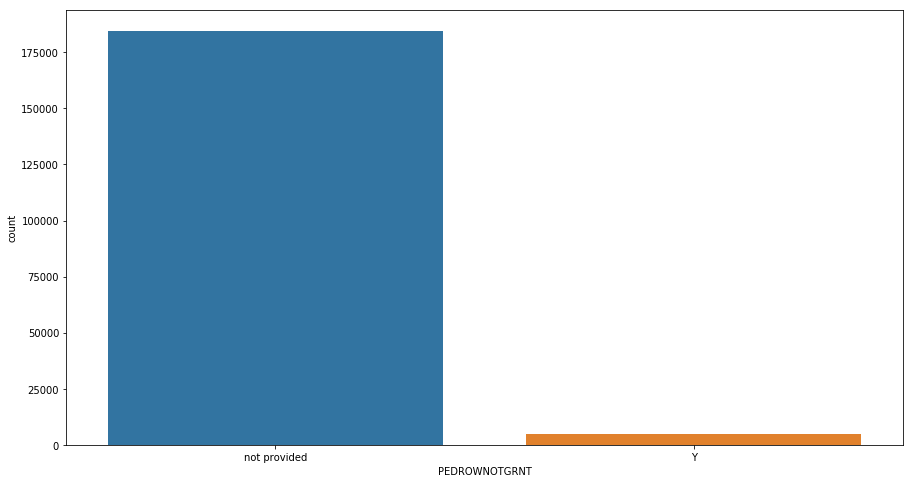

In [82]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'PEDROWNOTGRNT', data = df_a);

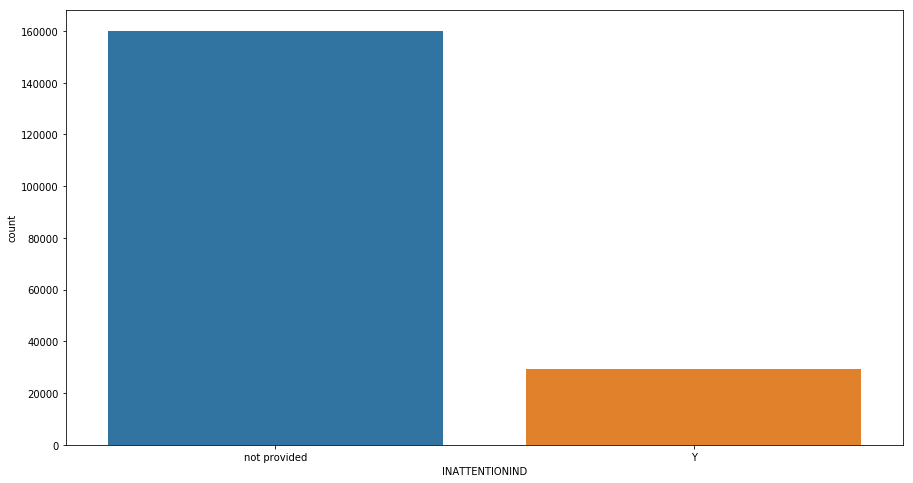

In [110]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'INATTENTIONIND', data = df_a);

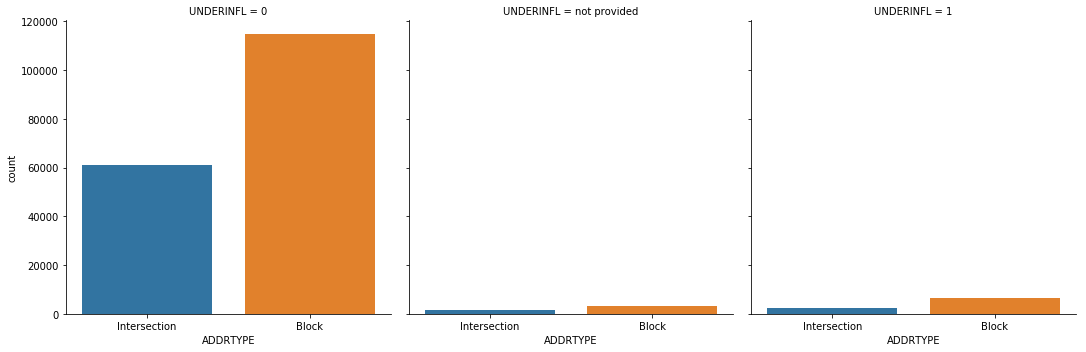

In [116]:
sns.catplot(x='ADDRTYPE', col='UNDERINFL', kind='count', data=df_a);

From the data provided those who are not under the influence of alcohol or drugs tend to be involved in block accidents

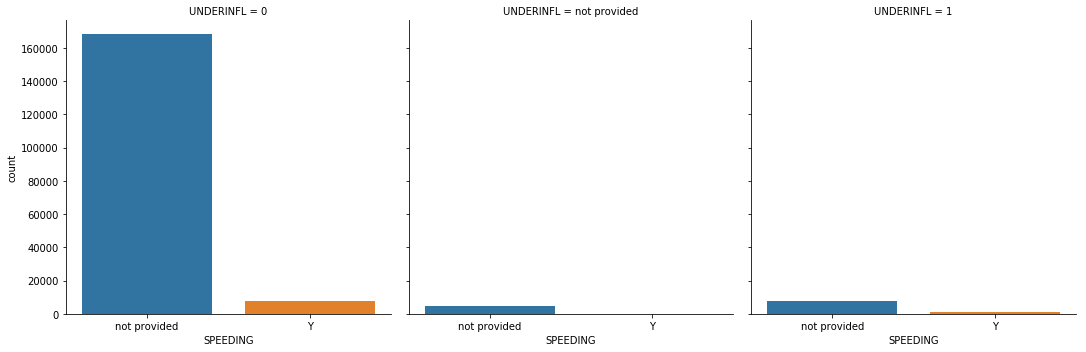

In [112]:
sns.catplot(x='SPEEDING', col='UNDERINFL', kind='count', data=df_a);

From the data provided most of the non speeding drivers were not under the influence of drugs or alcohol

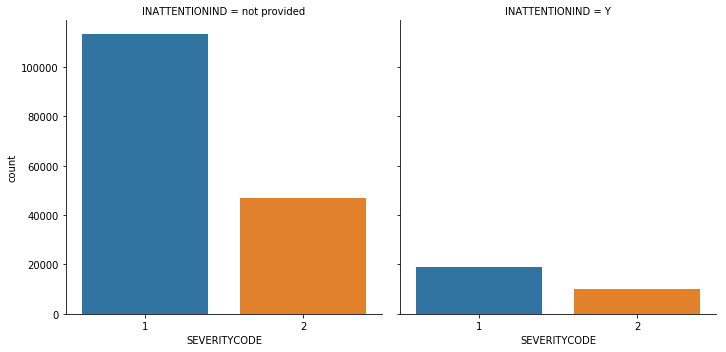

In [151]:
sns.catplot(x='SEVERITYCODE', col='INATTENTIONIND', kind='count', data=df_a);

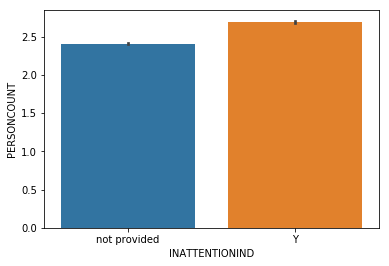

In [153]:
sns.barplot(x='INATTENTIONIND',y='PERSONCOUNT',data=df_a);

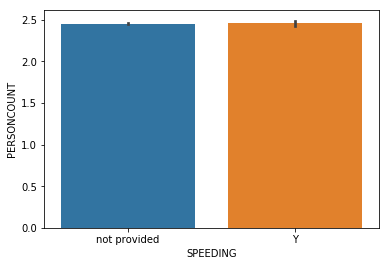

In [154]:
sns.barplot(x='SPEEDING',y='PERSONCOUNT',data=df_a);

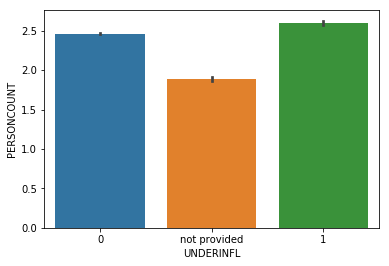

In [155]:
sns.barplot(x='UNDERINFL',y='PERSONCOUNT',data=df_a);

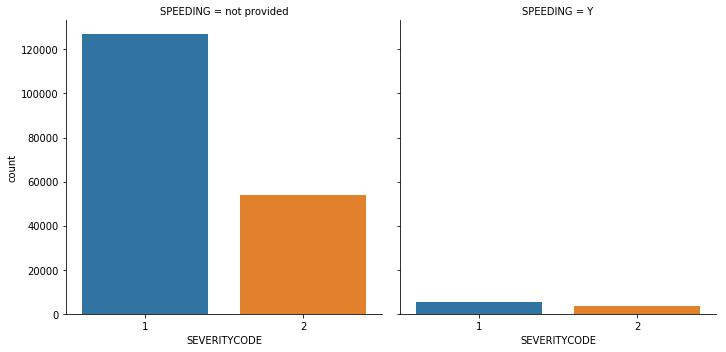

In [115]:

sns.catplot(x='SEVERITYCODE', col='SPEEDING', kind='count', data=df_a);

Non speeding accidents seems to result in property damage as compared to injuries.

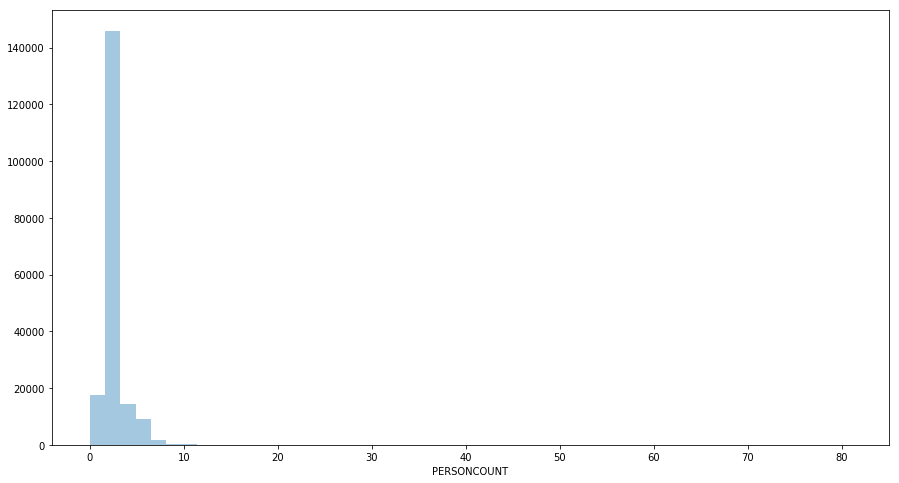

In [99]:
plt.figure(figsize=(15,8))
sns.distplot(df_a.PERSONCOUNT, kde=False);

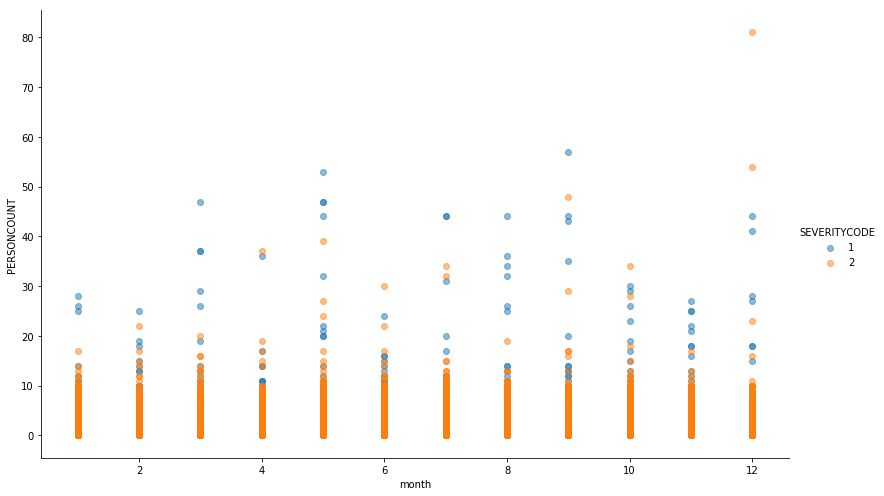

In [125]:
sns.lmplot(x='month', y='PERSONCOUNT', hue='SEVERITYCODE', data=df_a, height=7,aspect=1.6,fit_reg=False, scatter_kws={'alpha':0.5});

In [132]:
#pivot table with personcount and severity code by month
df_pivot = df_a.pivot_table(index='month', columns='SEVERITYCODE', values=['PERSONCOUNT'], aggfunc='sum')

In [133]:
df_pivot

PERSONCOUNT       
SEVERITYCODE           1      2
month                          
1                  26685  12558
2                  23021  10672
3                  25614  12746
4                  25258  12615
5                  26637  14113
6                  26725  13826
7                  26094  14038
8                  25272  13521
9                  24130  12084
10                 27561  14300
11                 26716  12956
12                 25515  11789

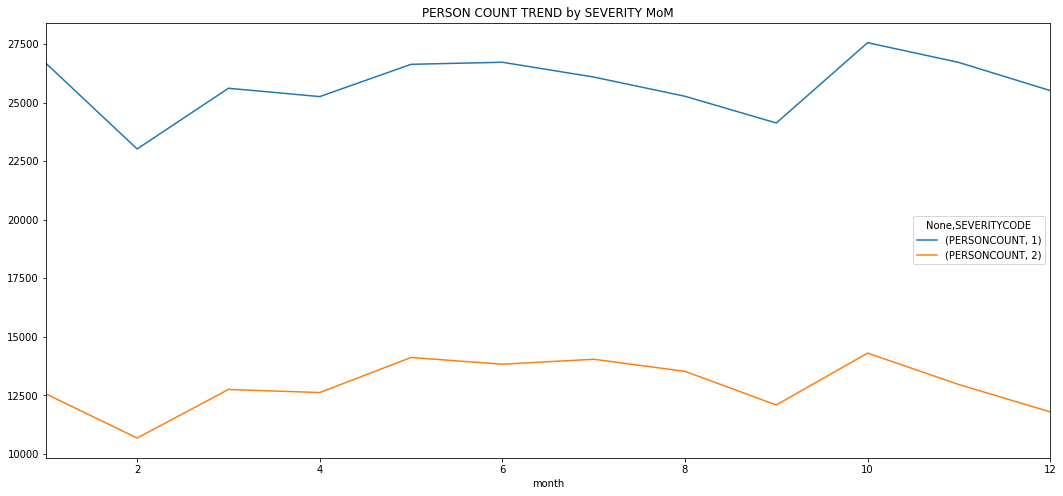

In [137]:
df_pivot.plot(kind='line',figsize=(18,8),title="PERSON COUNT TREND by SEVERITY MoM");

In [36]:
X = df_b.values[:,1:]

In [37]:
X.shape

(189339, 23)

In [38]:
X

array([[-122.3231484 ,   47.70314032,    2.        , ...,    4.        ,
           0.        ,    0.        ],
       [-122.3472943 ,   47.64717249,    2.        , ...,    6.        ,
           0.        ,    0.        ],
       [-122.33454   ,   47.60787143,    4.        , ...,    4.        ,
           0.        ,    0.        ],
       ...,
       [-122.3066886 ,   47.68304696,    3.        , ...,    1.        ,
           0.        ,    0.        ],
       [-122.3553167 ,   47.67873428,    2.        , ...,    1.        ,
           0.        ,    0.        ],
       [-122.2893597 ,   47.61101705,    2.        , ...,    1.        ,
           0.        ,    0.        ]])

In [39]:
Y = df_b.values[:,0:1]

In [40]:
Y

array([[2.],
       [1.],
       [1.],
       ...,
       [2.],
       [2.],
       [1.]])

In [41]:
Y = pd.get_dummies(df_b['SEVERITYCODE'])

In [42]:
Y_onehot = Y.values

In [43]:
Y_onehot

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]], dtype=uint8)

#### Feature Scaling to normalize the data using scikit learn

In [44]:
from  sklearn.preprocessing import StandardScaler

In [45]:
feature_scaler = StandardScaler()

In [46]:
X_scaled = feature_scaler.fit_transform(X)

In [47]:
X_scaled

array([[ 0.24586488,  1.48865792, -0.33577234, ...,  0.24534473,
        -0.16020664, -0.26135671],
       [-0.55964358,  0.49201745, -0.33577234, ...,  0.89916571,
        -0.16020664, -0.26135671],
       [-0.13415948, -0.20783151,  1.14671063, ...,  0.24534473,
        -0.16020664, -0.26135671],
       ...,
       [ 0.79496465,  1.1308478 ,  0.40546914, ..., -0.73538673,
        -0.16020664, -0.26135671],
       [-0.82727125,  1.05405027, -0.33577234, ..., -0.73538673,
        -0.16020664, -0.26135671],
       [ 1.37305764, -0.15181625, -0.33577234, ..., -0.73538673,
        -0.16020664, -0.26135671]])

#### Split data into training and testing set

#### Training set
The data will be the main basis for defining the coefficients/parameters of the model;

#### Testing set
These are the data that will be separated and will not be seen by the model to test if the model works (generally these values are compared with a walk forward method and finally the mean error is measured).

For the purposes of this model, 20% was allocated to the testing data and 80% was allocated to the training set. It is advisable that most of the data is aligned to training to ensure that performance of the model is improved from more detailed learning.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_onehot, test_size=0.2, random_state=50)

#### Model Creation

In [50]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(50, input_dim=X.shape[1],activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [51]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1200      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 6,402
Trainable params: 6,402
Non-trainable params: 0
_________________________________________________________________
None


#### Model Compilation

In [52]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### Fit/Train the Model

In [53]:
model_run = model.fit(X_train, 
           Y_train, 
           epochs=50, 
           batch_size=32,
           verbose=1)

Epoch 1/50
151471/151471 [==============================] - 34s 222us/step - loss: 0.5005 - acc: 0.7524
Epoch 2/50
151471/151471 [==============================] - 27s 179us/step - loss: 0.4797 - acc: 0.7565
Epoch 3/50
151471/151471 [==============================] - 26s 173us/step - loss: 0.4761 - acc: 0.7586
Epoch 4/50
151471/151471 [==============================] - 26s 169us/step - loss: 0.4743 - acc: 0.7586
Epoch 5/50
151471/151471 [==============================] - 28s 185us/step - loss: 0.4733 - acc: 0.7592
Epoch 6/50
151471/151471 [==============================] - 27s 178us/step - loss: 0.4725 - acc: 0.7594
Epoch 7/50
151471/151471 [==============================] - 27s 181us/step - loss: 0.4717 - acc: 0.7596
Epoch 8/50
151471/151471 [==============================] - 27s 176us/step - loss: 0.4709 - acc: 0.7598
Epoch 9/50
151471/151471 [==============================] - 27s 175us/step - loss: 0.4703 - acc: 0.7605
Epoch 10/50
151471/151471 [==============================] - 28s

#### Hyperparameter Tuning

To improve the performance of the model, epochs and batch size were tuned to ensure that a higher accuracy is achieved.

#### Model Evaluation

In [54]:
model.evaluate(X_test, Y_test)

37868/37868 [==============================] - 2s 56us/step


[0.4811430517428652, 0.7531160874585611]

In [55]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = 32)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

36368/36368 [==============================] - 2s 50us/step
score: 0.48
acc: 0.75


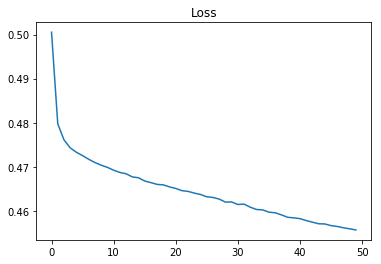

In [56]:
plt.plot(model_run.history['loss']);
plt.title("Loss")
plt.show()

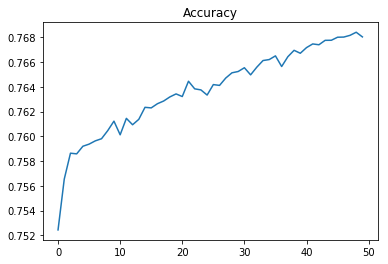

In [57]:
plt.plot(model_run.history['acc']);
plt.title("Accuracy")
plt.show()

In [58]:
X_pred = model.predict_classes(X_test)
X_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [59]:
Y_encoded = np.argmax(Y_test, axis = 1)
Y_encoded

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [60]:
print(classification_report(Y_encoded, X_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     25239
           1       0.67      0.37      0.48     11129

   micro avg       0.75      0.75      0.75     36368
   macro avg       0.72      0.65      0.66     36368
weighted avg       0.74      0.75      0.73     36368



In [61]:
def plot_confusion_matrix(model, X, Y):
    plt.figure(figsize=(15,8))
    sns.heatmap(confusion_matrix(X, Y), annot=True, fmt='d', cmap='Blues_r', alpha=0.8, square=True, linewidths=1)

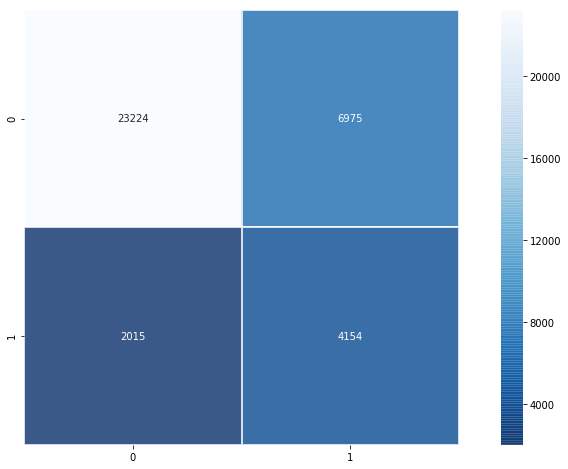

In [62]:
plot_confusion_matrix(model,X_pred, Y_encoded)

#### Results and Discussion

From the Exploratory Data Analysis that we performed, it was observed that the general view that wet roads, overcast weathers and poor lighting have larger contribution to road accidents is inaccurate. From the data analysis performed it was observed that in Seattle accidents do happen more in dry roads, clear weathers and during the day without and artificial form of lighting. 

A clear interpretation to this implies that the authorities should do a deep dive into what actually takes place during the day. Could be an issue of day traffic in terms of vehicles and pedestrians that might be contributing to these accidents. There is real need for the Department of transport and other relevant stakeholders to take action and strategize on how accidents can be minimised during these periods and conditions.

The classification algorithm retained an accuracy of 75% having a total of 27,378 true predictions out of a total number of 36,368.

Below is a summary of the results from the confusion matrix;

 precision    recall  f1-score   support

           0       0.77      0.92      0.84     25239
           1       0.67      0.37      0.48     11129

           
   | Metric      | precision | recall  | f1-score | support|
   |-------------|-----------|---------|----------|--------|
   |micro avg    |   0.75    |  0.75   |   0.75   |  36368 |
   |macro avg    |   0.72    |  0.65   |   0.66   |  36368 |
   |weighted avg |   0.74    |  0.75   |   0.73   |  36368 |

#### Conclusion

The purpose of the project was to predict the severity of an accident based on the accident data for Seattle City. By applying supervised learning in the form of a multiclassification algorithm, we were able to able an accuracy of 75% which might indicate that the algorithm to a larger extent will be able to predict and help various stakeholders in planning against these accidents. The end result we all wish for will be a decline in the rate of these accidents. Exploratory Data Analysis apart from the model itself was done to give a clear picture to the authorities and various stakeholders on the certain conditions that are mostly resulting in accidents. 

In conclusion, more work can still be done to ensure that the accuracy is improved and more variables can still be gathered and try to establish the relationships, correlations and the causality factors of the variables to the severity of the accidents.
